In [243]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
file_path = r'C:\Users\smita\Downloads\day.csv'
df = pd.read_csv(file_path)

In [245]:
# Display the first few rows of the DataFrame
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [246]:
#Check for missing values and handle them if necessary.

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [247]:
#Explore the statistical summary of numeric columns.

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


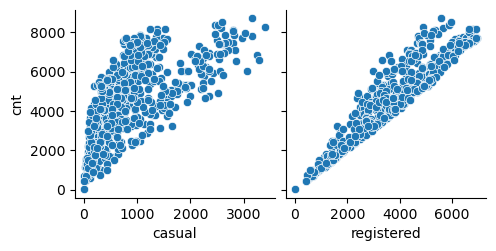

In [248]:
# visualise the data
sns.pairplot(data=df, 
            x_vars = ['casual', 'registered'],
            y_vars = 'cnt')

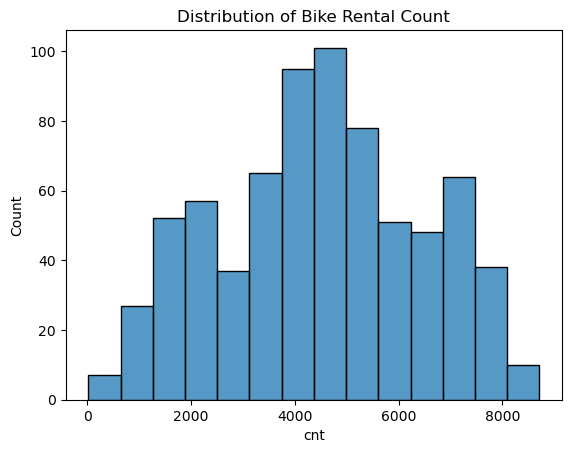

In [249]:
#Visualize the distribution of the target variable 'cnt' and other relevant variables.

sns.histplot(df['cnt'])
plt.title('Distribution of Bike Rental Count')
plt.show()

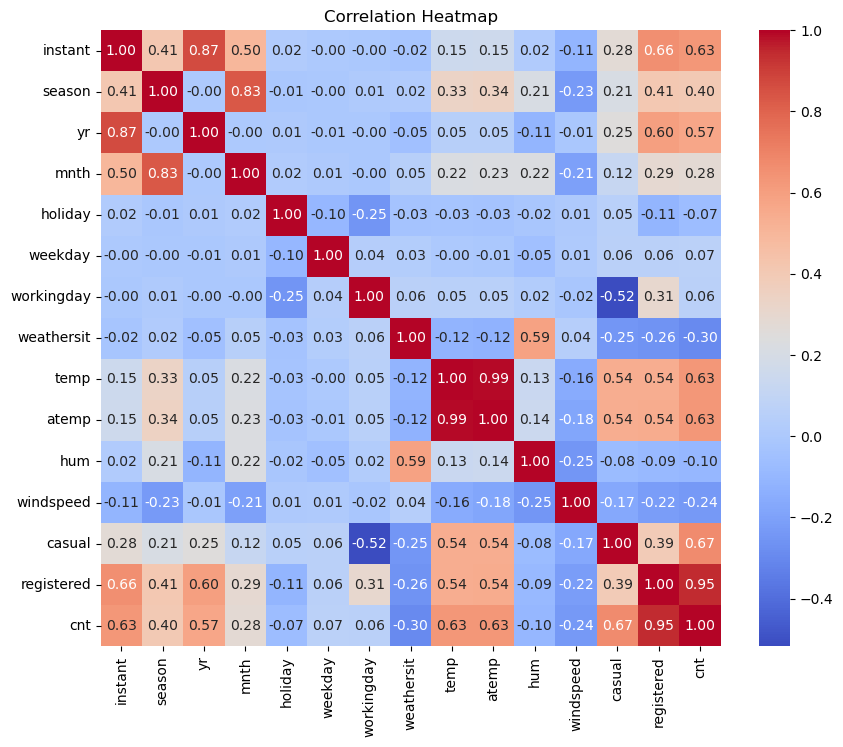

In [250]:
# Calculate the correlation matrix with numeric_only parameter set to True
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

NaN counts before handling:
[2 1 3]
[1 2 3 4]
NaN counts after handling:
['Light Rain' 'Clear' 'Heavy Rain']
['Spring' 'Summer' 'Fall' 'Winter']
[0 1]


C:\Users\smita\AppData\Local\Temp\ipykernel_16804\2840629495.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dteday'] = pd.to_datetime(df['dteday'])


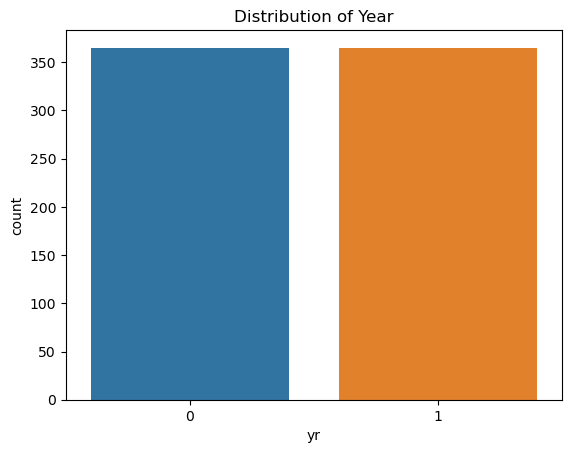

In [251]:
# Convert 'dteday' to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

# Extract additional features from the datetime column
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['dayofweek'] = df['dteday'].dt.dayofweek

# Define mapping dictionaries
weather_mapping = {1: 'Clear', 2: 'Light Rain', 3: 'Heavy Rain'}
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Check the counts of NaN values before handling
print("NaN counts before handling:")
print(df['weathersit'].unique())
print(df['season'].unique())

# Replace NaNs with a placeholder value (-1 for example)
#df['weathersit'].fillna(-1, inplace=True)
#df['season'].fillna(-1, inplace=True)

# Map numeric categorical features to string labels
df['weathersit'] = df['weathersit'].map(weather_mapping)
df['season'] = df['season'].map(season_mapping)

# Check the counts of NaN values after handling
print("NaN counts after handling:")
print(df['weathersit'].unique())
print(df['season'].unique())

# Check the unique values in 'yr' column to decide whether to keep or drop
print(df['yr'].unique())

# Visualize the distribution of 'yr' values
sns.countplot(x='yr', data=df)
plt.title('Distribution of Year')
plt.show()

To build a multiple linear regression model using the 'cnt' variable as the target variable, we need to follow these steps:

Prepare the data by encoding categorical variables, splitting the data into training and testing sets, and scaling the features if necessary.
Build the multiple linear regression model using the training data.
Evaluate the model's performance on the test set using the R-squared score.

In [252]:
# create X and y
df["registered"] = pd.to_numeric(df["registered"])

X = df['registered']
y = df['cnt']

In [253]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state=100)

In [254]:
X_train.shape

(510,)

In [255]:
# reshape X_train to (n,1)

X_train_lm = X_train.values.reshape(-1,1)
X_train_lm.shape

X_test_lm = X_test.values.reshape(-1,1)
X_test_lm.shape

(220, 1)

In [256]:
# steps in sklearn model building

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm, y_train)


LinearRegression()

In [257]:
# see params
print(lm.coef_)
print(lm.intercept_)



[1.17195828]
210.38042759739074


In [258]:
# 3. make predictions (train, test)

y_train_pred = lm.predict(X_train_lm) 
y_test_pred = lm.predict(X_test_lm)


In [259]:
# 4. evaluate (r2)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8992875663609934
0.8802227591794832


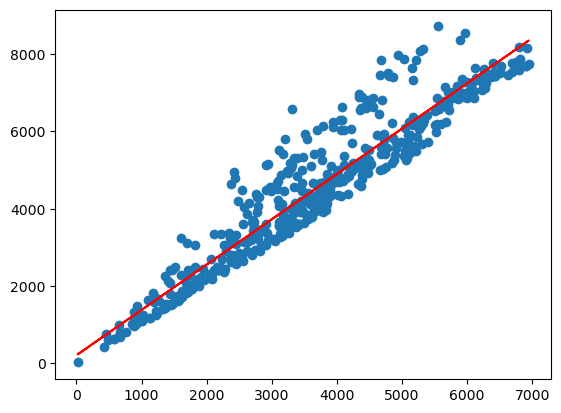

In [260]:
# Plotting the training set
plt.scatter(X_train_lm, y_train)
plt.plot(X_train_lm, y_train_pred, 'r')
plt.show()

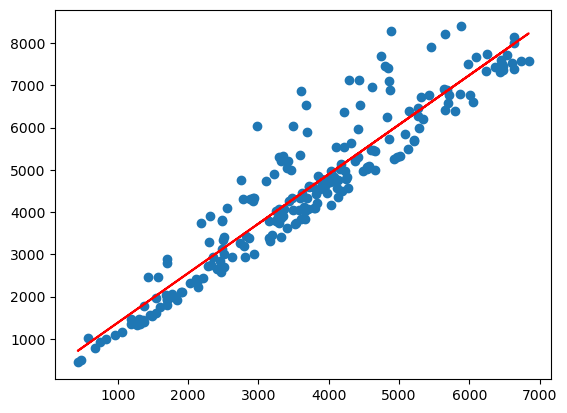

In [261]:
# Plotting the test set
plt.scatter(X_test_lm, y_test)
plt.plot(X_test_lm, y_test_pred, 'r')
plt.show()